In [1]:
%pylab inline
import time, tvbl, mdn, scipy.sparse

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(42)

num_item = 64
num_node = 90
num_skip = 10
dt = 0.1
sparsity = 0.3
horizon = 256
num_time = int(1e3/dt)
horizonm1 = horizon - 1
sim_params = np.zeros((3, num_item), 'f')
sim_params[0] = 1.001
sim_params[1] = 1.0
sim_params[2] = np.logspace(-1.8, -2.0, num_item)/num_node*80 # k
z_scale = np.sqrt(dt)*np.r_[0.01, 0.1].astype('f')*1e-8

weights, lengths = np.random.rand(2, num_node, num_node).astype('f')
lengths[:] *= 0.8
lengths *= (horizon*dt*0.8)
zero_mask = weights < (1-sparsity)
weights[zero_mask] = 0
csr_weights = scipy.sparse.csr_matrix(weights)
idelays = (lengths[~zero_mask]/dt).astype('i')+2

y = tvbl.run(
    csr_weights, idelays, sim_params, z_scale, horizon,
    num_item=num_item, num_node=num_node, num_time=num_time,
    dt=dt, num_skip=num_skip
)
np.save('y.npy', y)

100%|██████████████████████████████████████| 1001/1001 [00:16<00:00, 60.62it/s]

16.533142566680908 s 38710.124068595775 iter/s


In [3]:
import ipywidgets as widgets

slider = widgets.IntSlider(value=0, min=0, max=100)
slider

IntSlider(value=0)

Training MDN on 4000 samples...
Input features dimension: 1, Output parameters dimension: 2

Starting training...
Iteration     1/400, Loss: 8.7304
Iteration   200/400, Loss: 1.9709
Iteration   400/400, Loss: 1.9161
Training finished.

Final loss: 1.9161

--- Validation ---
True Mode 1 (for positive feats): [2. 3.]
True Mode 2 (for negative feats): [-2. -3.]
Predicted mode for positive feature: [1.99 3.  ]
Predicted mode for negative feature: [-2. -3.]

Success: The network correctly identified the true modes of the distribution.
Generating samples for positive feature...
Generating samples for negative feature...


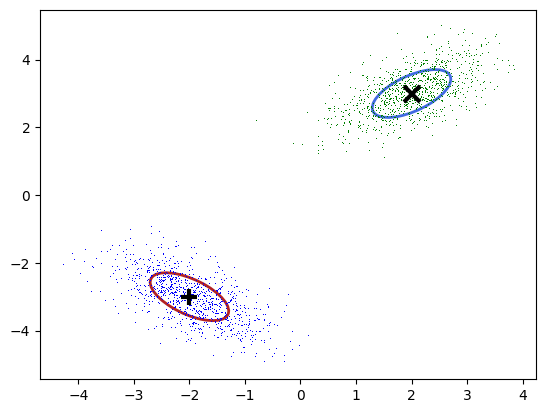

In [4]:
import mdn
mdn.test_mdn(plot=True)